<a href="https://colab.research.google.com/github/Vetair/MVexercises/blob/main/CNN_in_Keras_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# import libraries
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Define paths for your dataset
train_dir = r'/content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/train'
test_dir = r'/content/drive/MyDrive/Colab Notebooks/Datasets/data_mv/test'

In [22]:
# Preprocess the data and slipt to train, test and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb'
)

x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

# validation_split = 0.2
# split_index = int((1 - validation_split) * len(x_train))

# print(split_index)

# x_validation = x_train[split_index:]
# y_validation = y_train[split_index:]
# print(x_validation.shape)
# print(y_validation.shape)

# x_train = x_train[:split_index]
# y_train = y_train[:split_index]

# print(x_train.shape)
# print(y_train.shape)

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [2]:
# Build the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3),activation='relu'),
    Flatten(),
    Dense(units=500,activation='relu'),
    Dense(units=3,activation='softmax'),

])

In [3]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Model fitting to train
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.1234 - accuracy: 0.1667 - val_loss: 24.0958 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 22.9067 - accuracy: 0.5000 - val_loss: 1.6985 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.8448 - accuracy: 0.6667 - val_loss: 2.0187 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.5220 - accuracy: 0.2500 - val_loss: 1.2062 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6991 - accuracy: 0.5833 - val_loss: 1.1216 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.5986 - accuracy: 0.8333 - val_loss: 1.3786 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.4631 - accuracy: 0.6667 - val_loss: 1.4046 - val_accuracy: 0.2500
Epoch 8/10
1/1 [=======================

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:",test_loss)
print("Test accuracy:", test_acc)

1/1 [==============================] - 1s 596ms/step - loss: 1.2371 - accuracy: 0.5625
Test loss: 1.2370522022247314
Test accuracy: 0.5625


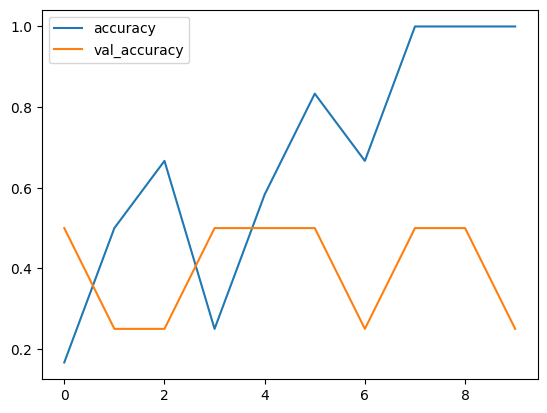

In [26]:
# Visualization
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()